# 회귀 과제
21 Jan 2021(Thu)

---

마감 시간: **28 Jan 2021(Thu) 19:30**  
제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 18기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

- 분류: 학습 데이터의 합격 확률을 범주형 자료로 바꿔준 다음, 로지스틱 회귀를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"# TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [2]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
Jupyter Notebook을 사용하시는 경우 이 코드 파일과 같은 폴더(디렉토리) 내에 graduate_train.csv 파일과 graduate_test.csv 파일.

In [4]:
# train 데이터 불러오기
df = pd.read_csv("/content/gdrive/MyDrive/graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [5]:
# test 데이터 불러오기
test = pd.read_csv("/content/gdrive/MyDrive/graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [6]:
## TODO
df.isnull().sum()
test.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 결측치가 없습니다.

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [7]:
## TODO
df.info()
temp = df
temp['Research'] = temp['Research'].map({"Yes":1,"No":0})
temp.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.1+ KB


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,0,0.71
1,307,105,2,2.5,4.5,8.12,1,0.67
2,329,111,4,4.5,4.0,9.01,1,0.81
3,300,105,1,1.0,2.0,7.80,0,0.58
4,329,114,5,4.0,5.0,9.30,1,0.86


In [8]:
df = temp
df.head()
temp = test
temp['Research'] = temp['Research'].map({"Yes":1,"No":0})
temp.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,0
1,297,96,2,2.5,1.5,7.89,0
2,302,101,2,2.5,3.5,7.96,0
3,318,112,3,4.0,3.5,8.67,0
4,304,100,4,1.5,2.5,7.84,0


In [9]:
test = temp
test.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,0
1,297,96,2,2.5,1.5,7.89,0
2,302,101,2,2.5,3.5,7.96,0
3,318,112,3,4.0,3.5,8.67,0
4,304,100,4,1.5,2.5,7.84,0
5,330,116,4,5.0,4.5,9.45,1
6,315,110,2,3.5,3.0,8.46,1
7,317,107,3,4.0,3.0,8.70,0
8,330,114,3,4.5,4.5,9.24,1
9,323,111,5,4.0,5.0,9.86,1


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. Research 변수가 범주형이어서 yes,no 두 경우밖에 없어 map 을 통해 1,0으로 치환해주었습니다.

# 3. 선형(Linear) 회귀

In [10]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [11]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [12]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 7)
training response size: (320,)
test predictors size: (80, 7)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
linear = LinearRegression()
# 2. 모델을 적합시킵니다.
## TODO
linear.fit(X_train,y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2 : %.2f" % linear.score(X_train,y_train))

Training R^2 : 0.83


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO
y_pred = linear.predict(X_test)
print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [18]:
## TODO
print("intercept: ",linear.intercept_)

intercept:  -1.2551828664076383


Q. 절편 계수의 의미는 무엇인가요?  
A. 설명변수의 값에 0을 대입하였을 때 나올 수 있는 종속 변수의 값이다. 유의미한 결과값을 위해서는 절편 계수가 필요하다.

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [19]:
## TODO
beta = pd.DataFrame(linear.coef_, index=X.columns, columns=["slope"])
beta.sort_values("slope")

,slope
GRE Score,0.001640
University Rating,0.002748
TOEFL Score,0.003606
SOP,0.007253
LOR,0.017343
Research,0.026481
CGPA,0.112079


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 기울기 계수는 설명변수와 종속변수와의 상관관계를 나타낸다. 따라서 값이 가장 큰 CGPA 값이 유의미한 관계를 가지고 있다고 볼 수 있다
누점 학점 평균이 CGPA 인데, 대학원에서 학점을 중요시 여긴다는 것을 알 수 있다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

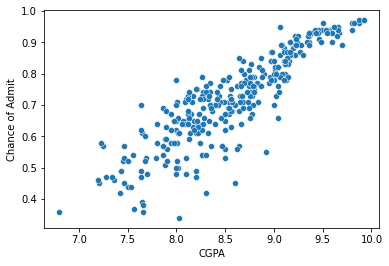

In [20]:
## TODO
sns.scatterplot(x=X_train['CGPA'],y=y_train)

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

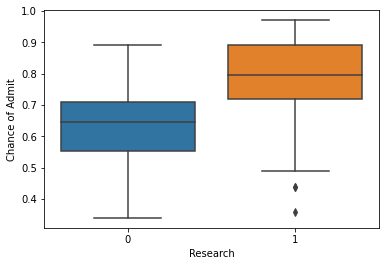

In [21]:
## TODO
sns.boxplot(x=X_train['Research'],y=y_train)

### 3.2. StatsModels로 선형 회귀 시행하기

In [22]:
import statsmodels.api as sm

In [23]:
## TODO
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              5233.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):                   4.95e-320
Time:                        18:11:19   Log-Likelihood:                          408.55
No. Observations:                 320   AIC:                                     -803.1
Df Residuals:                     313   BIC:                                     -776.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0031      0.000     -7.047      0.000      -0.004      -0.002
TOEFL Score           0.0040      0.001      3.121      0.002       0.001       0.007
University Rating     0.0138      0.005      2.666      0.008       0.004       0.024
SOP                   0.0157      0.006      2.468      0.014       0.003       0.028
LOR                   0.0156      0.006      2.689      0.008       0.004       0.027
CGPA                  0.1282      0.014      9.414      0.000       0.101       0.155
Research              0.0566      0.009      6.475      0.000       0.039       0.074
==============================================================================
Omnibus:                       52.807   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.143
Skew:                          -0.993   Prob(JB):                     1.46e-18
Kurtosis:                       4.490   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. F-statistic 값이 이상치가 나오므로, 더 좋은 모델은 아닌 것 같다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. 기울기가 0.01 정도로 큰 편은 아니므로 영향이 있으나 미미한 수준인 것 같다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [77]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import cross_val_score

# 1. 먼저 모델을 만들어 줍니다.
## TODO
alphas = [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,1]
ridge_cv = RidgeCV(alphas=alphas, cv = 5)
model = ridge_cv.fit(X_train,y_train)
print(model.alpha_)

ridge = Ridge(alpha=1)
# 2. 모델을 적합시킵니다.
## TODO
ridge.fit(X_train,y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % ridge.score(X_train, y_train))

1.0
Training R^2: 0.83


In [79]:
from sklearn.linear_model import LassoCV, Lasso

# 1. 먼저 모델을 만들어 줍니다.
## TODO
alphas = [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,1]
lasso_cv = LassoCV(alphas=alphas, cv = 5)
model = lasso_cv.fit(X_train,y_train)
print(model.alpha_)

lasso = Lasso(alpha=0.0001)
# 2. 모델을 적합시킵니다.
## TODO
lasso.fit(X_train,y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % lasso.score(X_train, y_train))

0.0001
Training R^2: 0.83


# 5. Logistic 회귀

종속변수를 범주형 자료로 바꿔 합격확률이 아닌 **합격여부**를 예측해보겠습니다.  
**이 문제에서는 합격확률이 0.7이상이면 합격으로 판단하고 0.7미만이면 불합격으로 판단합니다.**  
(0.7이라는 숫자는 임의로 지정한 것일 뿐, 분류 문제에서 기준이 되는 threshold는 보다 더 신중하게 결정해야 합니다. 보통 default값은 0.5입니다.)

In [80]:
# train 데이터의 종속변수인 'Chance of Admit'은 숫자형 자료로 이루어져 있습니다.
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,0,0.71
1,307,105,2,2.5,4.5,8.12,1,0.67
2,329,111,4,4.5,4.0,9.01,1,0.81
3,300,105,1,1.0,2.0,7.80,0,0.58
4,329,114,5,4.0,5.0,9.30,1,0.86


In [81]:
# 종속변수인 'Chance of Admit'을 범주형 자료로 바꿔줍시다. 0.7 이상은 합격(1), 0.7 미만은 불합격(0)으로 지정해줍니다.
df["Chance of Admit"] = df["Chance of Admit"].apply(lambda x: 1 if x>=0.7 else 0)

# for문을 사용할 수도 있지만 웬만하면 for문은 지양하도록 합시다.
# for i in range(400):
#     df["Chance of Admit"][i] = 1 if df["Chance of Admit"][i]>=0.7 else 0

In [82]:
# 'Chance of Admit'이 제대로 변경되었는지 확인해봅시다.
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,0,1
1,307,105,2,2.5,4.5,8.12,1,0
2,329,111,4,4.5,4.0,9.01,1,1
3,300,105,1,1.0,2.0,7.80,0,0
4,329,114,5,4.0,5.0,9.30,1,1


In [83]:
# 먼저 종속변수와 설명변수를 지정해줍니다.
X = df.drop("Chance of Admit", axis=1)
y = df["Chance of Admit"]

In [84]:
# train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [85]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 7)
training response size: (320,)
test predictors size: (80, 7)
test response size: (80,)


In [86]:
from sklearn.linear_model import LogisticRegression

# 1. 먼저 모델을 만들어 줍니다.
## TODO
logistic = LogisticRegression()
# 2. 모델을 적합시킵니다.
## TODO
logistic.fit(X_train,y_train)
# 3. train 세트에서의 성능을 확인합니다.
## TODO
print("Training R^2:", logistic.score(X_train, y_train))

Training R^2: 0.846875


In [88]:
# 학습된 모델로부터 대학원 합격을 예측하고 accuracy, f1-score, confusion matrix를 구해봅시다.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# 0.7 이상은 1로, 0.7 미만은 0으로 예측하는 코드
y_pred = np.where(logistic.predict_proba(X_test)[:,1]>0.7, 1, 0)

print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %.2f" %f1_score(y_test, y_pred))

print("-"*40)
print("Confusion matrix", "\n")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Accuracy: 0.79
F1 score: 0.77
----------------------------------------
Confusion matrix 

    0   1
0  34   4
1  13  29


In [89]:
# 이제 test 데이터를 불러와 학습한 모델로 합격 여부를 예측해봅시다.
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,0
1,297,96,2,2.5,1.5,7.89,0
2,302,101,2,2.5,3.5,7.96,0
3,318,112,3,4.0,3.5,8.67,0
4,304,100,4,1.5,2.5,7.84,0


In [95]:
# test 데이터로 예측결과인 pred를 만들어줍니다.
## TODO
pred = logistic.predict(test)

In [96]:
# test 데이터에 예측결과를 추가해줍니다.
test["Chance of Admit"] = pred
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,304,103,5,5.0,4.0,8.64,0,1
1,297,96,2,2.5,1.5,7.89,0,0
2,302,101,2,2.5,3.5,7.96,0,0
3,318,112,3,4.0,3.5,8.67,0,1
4,304,100,4,1.5,2.5,7.84,0,0


In [97]:
# 예측된 결과를 csv 파일로 저장해줍니다. ipynb 파일과 csv 파일을 본인 Github에 업로드해주시면 됩니다.
test.to_csv("graduate_submission.csv", index=False)